In [14]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os
from scipy.stats import zscore

import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# current_working_directory = os.getcwd()
# print(f"ÌòÑÏû¨ ÌååÏù¥Ïç¨ ÏΩîÎìúÍ∞Ä Ïã§ÌñâÎêòÎäî ÎîîÎ†âÌÜ†Î¶¨: {current_working_directory}\n")

file_path_absolute ='C:/Users/mumu1/Desktop/project_movie_data/project_dataset/olist_orders_dataset.csv'
o_df_order = pd.read_csv(file_path_absolute, encoding='ISO-8859-1')

display(o_df_order.head())

# orders Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ : ÎàÑÎùΩ, Ï§ëÎ≥µ, Ïù¥ÏÉÅ
o_df_order.describe()
o_df_order.info()
df_order = o_df_order.copy()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [2]:
%pip install pandas-summary

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
o_df_order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
# Í≤∞Ï∏°Í∞í ÌôïÏù∏
# 1. Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï† Ïª¨Îüº Î¶¨Ïä§Ìä∏ Ï†ïÏùò
missing_value_cols = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

# 2. Í∞Å Ïª¨ÎüºÎ≥ÑÎ°ú Í≤∞Ï∏°Ïπò Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÎäî Î∂àÎ¶¨Ïñ∏ ÎßàÏä§ÌÅ¨(Boolean Mask) ÏÉùÏÑ±
# 'isnull()' Ìï®ÏàòÎäî Í≤∞Ï∏°Ïπò(NaN)Ïùº Îïå TrueÎ•º Î∞òÌôòÌï©ÎãàÎã§.
approved_at_na = df_order['order_approved_at'].isnull()
carrier_date_na = df_order['order_delivered_carrier_date'].isnull()
customer_date_na = df_order['order_delivered_customer_date'].isnull()

# 3. ÏÑ∏ Í∞ÄÏßÄ ÎßàÏä§ÌÅ¨Î•º '|' (or) Ïó∞ÏÇ∞ÏûêÎ°ú Í≤∞Ìï©
# Ïù¥ Ï°∞Í±¥Îì§ Ï§ë ÌïòÎÇòÎùºÎèÑ TrueÏù∏ ÌñâÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.
na_mask = approved_at_na | carrier_date_na | customer_date_na

# 4. ÎßàÏä§ÌÅ¨Î•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî ÌñâÎßå ÌïÑÌÑ∞ÎßÅ
df_na = df_order[na_mask]

# 5. ÌïÑÌÑ∞ÎßÅÎêú Îç∞Ïù¥ÌÑ∞Ïùò ÏùºÎ∂ÄÎ•º ÌôïÏù∏
print("Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî ÌñâÏùò Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
print(df_na.head())

# 6. Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî ÌñâÏùò Í∞úÏàò ÌôïÏù∏
print(f"\nÍ≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî Ï¥ù ÌñâÏùò Ïàò: {len(df_na)}")


Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî ÌñâÏùò Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:
                             order_id                       customer_id  \
6    136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44   ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103  0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128  15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
154  6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   

    order_status order_purchase_timestamp    order_approved_at  \
6       invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
44       shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
103     invoiced      2018-08-03 17:44:42  2018-08-07 06:15:14   
128   processing      2017-09-03 14:22:03  2017-09-03 14:30:09   
154      shipped      2018-01-10 11:33:07  2018-01-11 02:32:30   

    order_delivered_carrier_date order_delivered_customer_date  \
6                            NaN         

In [16]:
# Í≤∞Ï∏°Î•†
print(df_order.isnull().sum() / len(df_order))

# 5%Ïù¥Ìïò 3Í∞ú Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df_order.dropna(subset=['order_approved_at'], inplace=True)
df_order.dropna(subset=['order_delivered_carrier_date'], inplace=True)
df_order.dropna(subset=['order_delivered_customer_date'], inplace=True)

# Î≥ÄÍ≤ΩÏÇ¨Ìï≠ ÌôïÏù∏
print("Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ df_orderÏùò Ï†ïÎ≥¥:")
print(df_order.info())

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
dtype: float64
Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ df_orderÏùò Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_dat

In [34]:
# Ïù¥ÏÉÅÏπò ÌÉêÏßÄ: Í≥ÑÏÇ∞Ìïú Î∞∞ÏÜ°ÏãúÍ∞Ñ Ï∞®Ïù¥Í∞Ä ÌÅ¨Í±∞ÎÇò ÏûëÏùÄ Í≤ΩÏö∞
print('\n=== Ïù¥ÏÉÅÍ∞í ÌôïÏù∏ ===')

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò
df_order["order_approved_at"] = pd.to_datetime(df_order["order_approved_at"])
df_order["order_purchase_timestamp"] = pd.to_datetime(df_order["order_purchase_timestamp"])
df_order["order_delivered_carrier_date"] = pd.to_datetime(df_order["order_delivered_carrier_date"])
df_order["order_delivered_customer_date"] = pd.to_datetime(df_order["order_delivered_customer_date"])
df_order["order_purchase_timestamp"] = pd.to_datetime(df_order["order_purchase_timestamp"])
df_order["order_estimated_delivery_date"] = pd.to_datetime(df_order["order_estimated_delivery_date"])

# ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞ (Ïùº Îã®ÏúÑ)
# Í≤∞Ï†úÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ: Ï£ºÎ¨∏ÏäπÏù∏Ïùº - Í≤∞Ï†úÏùº
df_order["purchase_to_approved"] = (df_order["order_approved_at"] - df_order["order_purchase_timestamp"]).dt.total_seconds()/86400
# Ï£ºÎ¨∏-Î∞∞ÏÜ° Í±∏Î¶∞ ÏãúÍ∞Ñ: Î∞∞ÏÜ°ÏôÑÎ£åÏùº - Ï£ºÎ¨∏ÏäπÏù∏Ïùº
df_order["approved_to_carrier"] = (df_order["order_delivered_carrier_date"] - df_order["order_approved_at"]).dt.total_seconds()/86400
# ÌÉùÎ∞∞ÏÇ¨-Î∞∞ÏÜ° Í±∏Î¶∞ ÏãúÍ∞Ñ: Î∞∞ÏÜ°ÏôÑÎ£åÏùº - ÌÉùÎ∞∞ÏÇ¨ Ï†ÑÎã¨Ïùº
df_order["carrier_to_customer"] = (df_order["order_delivered_customer_date"] - df_order["order_delivered_carrier_date"]).dt.total_seconds()/86400
# Í≥ÑÏÇ∞-Î∞∞ÏÜ° Í±∏Î¶∞ ÏãúÍ∞Ñ: - Î∞∞ÏÜ°ÏôÑÎ£åÏùº - Ï£ºÎ¨∏Í≥ÑÏÇ∞Ïùº
df_order["purchase_to_customer"] = (df_order["order_delivered_customer_date"] - df_order["order_purchase_timestamp"]).dt.total_seconds()/86400

# Î™®Îì† ÏãúÍ∞Ñ Í≥ÑÏÇ∞ Ïª¨ÎüºÏóêÏÑú ÏùåÏàò Í∞íÎßå Ï∞æÍ∏∞
# ÏãúÍ∞Ñ Í≥ÑÏÇ∞ Ïª¨Îüº Î¶¨Ïä§Ìä∏
time_cols = ["purchase_to_approved","approved_to_carrier","carrier_to_customer","purchase_to_customer"]

# Í∞Å Ïª¨ÎüºÎ≥Ñ ÏùåÏàò Í∞úÏàò Í≥ÑÏÇ∞
neg_counts = {col: (df_order[col] < 0).sum() for col in time_cols}

# Ï†ÑÏ≤¥ ÏùåÏàò Í∞úÏàò (Ìïú ÌñâÏù¥ÎùºÎèÑ ÏùåÏàòÏù∏ Í≤ΩÏö∞)
total_neg = df_order[(df_order[time_cols] < 0).any(axis=1)].shape[0]

# Í≤∞Í≥º Ï∂úÎ†•
print("Ïª¨ÎüºÎ≥Ñ ÏùåÏàò Í∞úÏàò:", neg_counts)
print("Ï†ÑÏ≤¥ ÏùåÏàò Í∞úÏàò (Ìïú ÌñâÏù¥ÎùºÎèÑ ÏùåÏàò):", total_neg)


=== Ïù¥ÏÉÅÍ∞í ÌôïÏù∏ ===
Ïª¨ÎüºÎ≥Ñ ÏùåÏàò Í∞úÏàò: {'purchase_to_approved': np.int64(0), 'approved_to_carrier': np.int64(0), 'carrier_to_customer': np.int64(0), 'purchase_to_customer': np.int64(0)}
Ï†ÑÏ≤¥ ÏùåÏàò Í∞úÏàò (Ìïú ÌñâÏù¥ÎùºÎèÑ ÏùåÏàò): 0


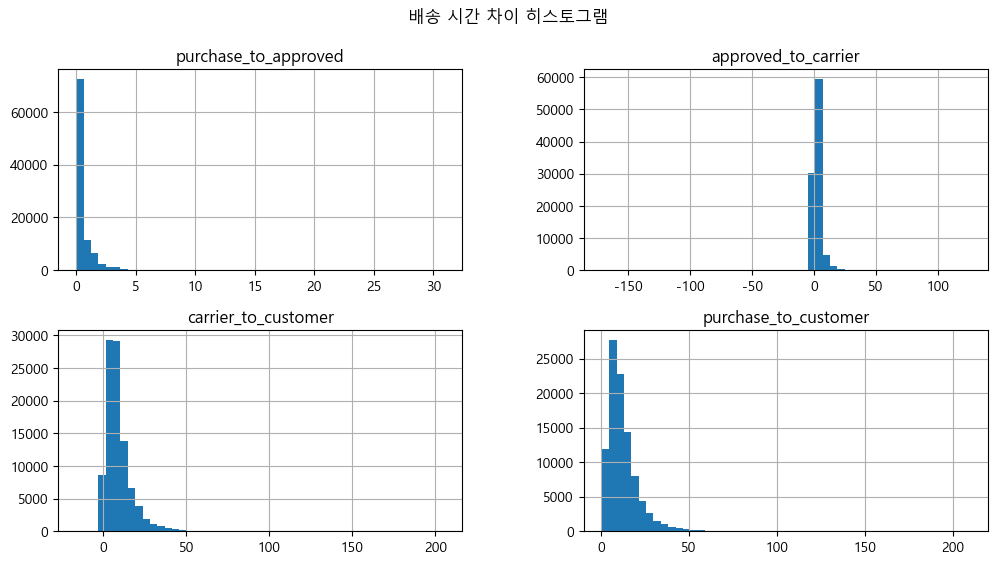

=== Z-score Í∏∞Ï§Ä Ïù¥ÏÉÅÏπò ÎπÑÏú® (|Z|>3) ===
purchase_to_approved: 2.26%
approved_to_carrier: 1.92%
carrier_to_customer: 1.64%
purchase_to_customer: 1.63%

=== IQR Í∏∞Ï§Ä Ïù¥ÏÉÅÏπò ÎπÑÏú® ===
purchase_to_approved: 9.26%
approved_to_carrier: 5.80%
carrier_to_customer: 5.26%
purchase_to_customer: 5.08%


In [10]:
# Ïù¥ÏÉÅÏπò ÌÉêÏßÄ ÏãúÍ∞ÅÌôî

# 1Ô∏è‚É£ ÌûàÏä§ÌÜ†Í∑∏Îû® ÏãúÍ∞ÅÌôî
df_order[time_cols].hist(bins=50, figsize=(12,6))
plt.suptitle("Î∞∞ÏÜ° ÏãúÍ∞Ñ Ï∞®Ïù¥ ÌûàÏä§ÌÜ†Í∑∏Îû®")
plt.show()

# 2Ô∏è‚É£ Í∑πÎã®Ïπò ÎπÑÏú® Í≥ÑÏÇ∞
print("=== Z-score Í∏∞Ï§Ä Ïù¥ÏÉÅÏπò ÎπÑÏú® (|Z|>3) ===")
for col in time_cols:
    z = zscore(df_order[col].dropna())
    outlier_ratio = (abs(z) > 3).mean() * 100
    print(f"{col}: {outlier_ratio:.2f}%")

# 3Ô∏è‚É£ IQR Í∏∞Î∞ò Ïù¥ÏÉÅÏπò ÎπÑÏú® Í≥ÑÏÇ∞
print("\n=== IQR Í∏∞Ï§Ä Ïù¥ÏÉÅÏπò ÎπÑÏú® ===")
for col in time_cols:
    data = df_order[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    iqr_outlier_ratio = ((data < lower_bound) | (data > upper_bound)).mean() * 100
    print(f"{col}: {iqr_outlier_ratio:.2f}%")

In [23]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
time_cols = ["purchase_to_approved", "approved_to_carrier", "carrier_to_customer", "purchase_to_customer"]

def remove_iqr_outliers_combined(df_order, cols):
    # Îπà ÎßàÏä§ÌÅ¨(mask) ÏÉùÏÑ±
    combined_mask = pd.Series([True] * len(df_order), index=df_order.index)
    
    for col in cols:
        data = df_order[col].dropna()
        if data.empty:
            print(f"Warning: No data to analyze for {col}. Skipping.")
            continue
            
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Í∞Å Ïª¨ÎüºÎ≥ÑÎ°ú Ïù¥ÏÉÅÏπò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÎäî ÌñâÏùÑ TrueÎ°ú ÌïòÎäî ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
        col_mask = (df_order[col] >= lower_bound) & (df_order[col] <= upper_bound)
        
        # ÏµúÏ¢Ö ÎßàÏä§ÌÅ¨Ïóê ÌòÑÏû¨ Ïª¨ÎüºÏùò ÎßàÏä§ÌÅ¨Î•º Í≤∞Ìï© (AND Ïó∞ÏÇ∞)
        # combined_mask = combined_mask & col_mask
        # Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Í≤ΩÏö∞Î•º Í≥†Î†§ÌïòÏó¨ `.fillna(False)`Î•º ÏÇ¨Ïö©ÌïòÎ©¥ Îçî ÏïàÏ†ÑÌï©ÎãàÎã§.
        combined_mask &= col_mask.fillna(True)
        
        print(f"'{col}'Ïóê ÎåÄÌïú ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± ÏôÑÎ£å.")
        
    # ÏµúÏ¢Ö ÎßàÏä§ÌÅ¨Î•º ÏÇ¨Ïö©ÌïòÏó¨ df_order ÏÉùÏÑ±
    df_order = df_order[combined_mask].copy()
    
    initial_len = len(df_order)
    removed_count = initial_len - len(df_order)
    
    print(f"\nÏ¥ù Ïù¥ÏÉÅÏπò Ï†úÍ±∞: {initial_len} -> {len(df_order)} (Ï†úÍ±∞Îêú Ìñâ Ïàò: {removed_count})")
    
    return df_order

# Ïã§Ìñâ
df_order = remove_iqr_outliers_combined(df_order, time_cols)

# ÏµúÏ¢Ö df_order Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÏÉÅÌÉú ÌôïÏù∏
print("\n[ÏµúÏ¢Ö df_orderÏùò Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ]")
print(df_order[time_cols].describe())

'purchase_to_approved'Ïóê ÎåÄÌïú ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± ÏôÑÎ£å.
'approved_to_carrier'Ïóê ÎåÄÌïú ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± ÏôÑÎ£å.
'carrier_to_customer'Ïóê ÎåÄÌïú ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± ÏôÑÎ£å.
'purchase_to_customer'Ïóê ÎåÄÌïú ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± ÏôÑÎ£å.

Ï¥ù Ïù¥ÏÉÅÏπò Ï†úÍ±∞: 78243 -> 78243 (Ï†úÍ±∞Îêú Ìñâ Ïàò: 0)

[ÏµúÏ¢Ö df_orderÏùò Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ]
       purchase_to_approved  approved_to_carrier  carrier_to_customer  \
count          78243.000000         78243.000000         78243.000000   
mean               0.213960             2.205594             7.855824   
std                0.392342             1.730066             5.227605   
min                0.000000            -1.333345            -2.892384   
25%                0.008681             0.868738             3.970093   
50%                0.012650             1.712755             6.937755   
75%                0.100260             3.159306            10.946759   
max                1.498750             7.626204            23.921458   

       purch

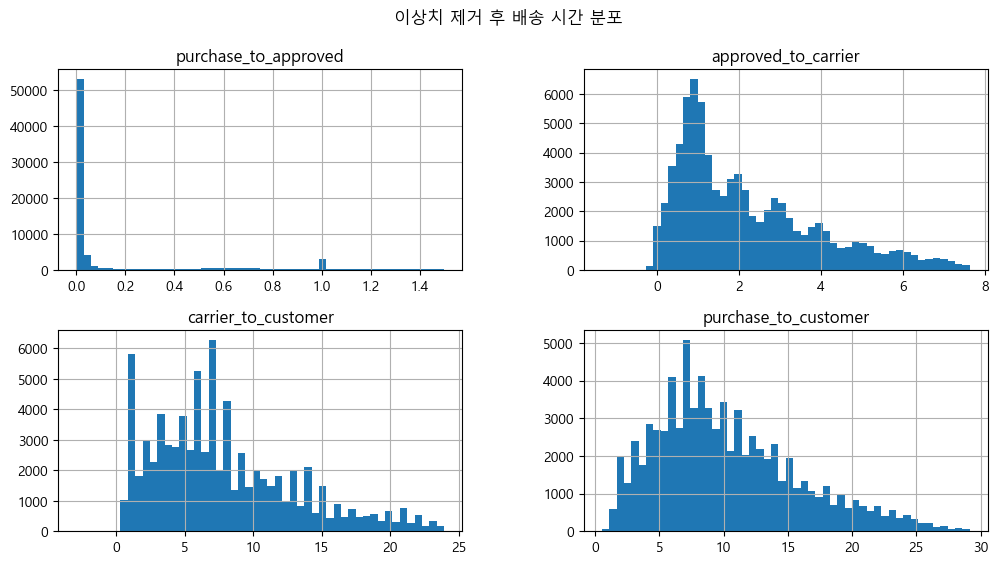

order_purchase_timestamp              order_approved_at  \
count                          77694                          77694   
mean   2018-01-02 11:09:14.460395776  2018-01-02 16:14:00.467886848   
min              2016-10-03 22:31:31            2016-10-04 10:19:23   
25%    2017-09-10 18:02:16.750000128     2017-09-10 19:43:28.500000   
50%       2018-01-20 09:12:31.500000     2018-01-20 11:57:48.500000   
75%              2018-05-09 10:38:10            2018-05-09 14:15:06   
max              2018-08-29 15:00:37            2018-08-29 15:10:26   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          77694                          77694   
mean   2018-01-04 21:33:17.827760128  2018-01-12 18:20:05.613895680   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%       2017-09-12 20:04:04.500000  2017-09-19 18:45:28.249999872   
50%              2018-01-23 18:20:05            2018-01-31 17:21:09   
75%              2018-05-10 18:29:00            2018-05-17 19:29:21   
max              2018-08-30 14:58:00            2018-09-10 22:38:43   
std                              NaN                            NaN   

       purchase_to_approved  approved_to_carrier  carrier_to_customer  \
count          77694.000000         77694.000000         77694.000000   
mean               0.211644             2.221729             7.865831   
min                0.000000             0.000174             0.000000   
25%                0.008669             0.880414             3.970243   
50%                0.012593             1.728976             6.942853   
75%                0.092442             3.172173            10.957297   
max                1.498750             7.626204            23.921458   
std                0.390404             1.724586             5.232599   

       purchase_to_customer  
count          77694.000000  
mean              10.299203  
min                0.533414  
25%                6.166548  
50%                9.165376  
75%               13.545168  
max               29.149572  
std                5.577010

In [24]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ Î∞∞ÏÜ° ÏãúÍ∞Ñ Î∂ÑÌè¨ ÌôïÏù∏
df_order[time_cols].hist(bins=50, figsize=(12,6))
plt.suptitle("Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ Î∞∞ÏÜ° ÏãúÍ∞Ñ Î∂ÑÌè¨")
plt.show()

# Ïù¥ÏÉÅÏπò ÌôïÏù∏ ÌõÑ ÎèÑÎ©îÏù∏ Í∑úÏπô Í∏∞Î∞ò Ï†úÍ±∞
df_order = df_order[df_order['approved_to_carrier'] >= 0]
df_order = df_order[df_order['carrier_to_customer'] >= 0]

# Í∏∞Ï¥à ÌÜµÍ≥Ñ ÌôïÏù∏
df_order[time_cols].describe()

df_order.describe()
# df_order = df_deliverd_clean


In [26]:
# ÌååÏùºÎì§Ïù¥ ÏûàÎäî Ìè¥Îçî Í≤ΩÎ°ú
folder_path = 'C:/Users/mumu1/Desktop/project_movie_data/project_dataset'

# ÌååÏùº Ïù¥Î¶ÑÏùÑ Î≥ÄÏàòÏóê Ìï†Îãπ
o_df_customers = pd.read_csv(os.path.join(folder_path, 'olist_customers_dataset.csv'), encoding='ISO-8859-1')
o_df_geolocation = pd.read_csv(os.path.join(folder_path, 'olist_geolocation_dataset.csv'), encoding='ISO-8859-1')
o_df_order_items = pd.read_csv(os.path.join(folder_path, 'olist_order_items_dataset.csv'), encoding='ISO-8859-1')
o_df_order_payments = pd.read_csv(os.path.join(folder_path, 'olist_order_payments_dataset.csv'), encoding='ISO-8859-1')
o_df_order_reviews = pd.read_csv(os.path.join(folder_path, 'olist_order_reviews_dataset.csv'), encoding='ISO-8859-1')
o_df_products = pd.read_csv(os.path.join(folder_path, 'olist_products_dataset.csv'), encoding='ISO-8859-1')
o_df_sellers = pd.read_csv(os.path.join(folder_path, 'olist_sellers_dataset.csv'), encoding='ISO-8859-1')



print("‚úÖ Î™®Îì† ÌååÏùºÏù¥ Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú Î©îÎ™®Î¶¨Ïóê Î°úÎìúÎêòÏóàÏäµÎãàÎã§.")

‚úÖ Î™®Îì† ÌååÏùºÏù¥ Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú Î©îÎ™®Î¶¨Ïóê Î°úÎìúÎêòÏóàÏäµÎãàÎã§.


In [27]:
### forÎ¨∏ÏùÑ Ïù¥Ïö©Ìïú ÏÇ¨Î≥∏ ÎßåÎì§Í∏∞

# 1. ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÎì§ÏùÑ Î¶¨Ïä§Ìä∏Ïóê Îã¥Í∏∞
original_dfs = [
    o_df_customers, o_df_geolocation, o_df_order_items,
    o_df_order_payments, o_df_order_reviews, o_df_products,
    o_df_sellers
]

# 2. Í∞Å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Î≥ÄÏàòÎ™ÖÏùÑ Î¨∏ÏûêÏó¥Î°ú Î¶¨Ïä§Ìä∏Ïóê Îã¥Í∏∞
original_names = [
    'o_df_customers', 'o_df_geolocation', 'o_df_order_items',
    'o_df_order_payments', 'o_df_order_reviews', 'o_df_products',
    'o_df_sellers'
]

# 3. Î∞òÎ≥µÎ¨∏ÏùÑ ÌÜµÌï¥ ÏÇ¨Î≥∏ÏùÑ ÎßåÎì§Í≥† Ï†ÑÏó≠ Î≥ÄÏàòÏóê Ìï†Îãπ
for original_df, original_name in zip(original_dfs, original_names):
    # 'o_df_'Î•º Ï†úÍ±∞Ìïú ÏÉàÎ°úÏö¥ Î≥ÄÏàòÎ™Ö ÏÉùÏÑ±
    new_name = original_name[2:]
    
    # exec() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÎèôÏ†ÅÏúºÎ°ú Î≥ÄÏàò Ìï†Îãπ
    # f-stringÏùÑ Ïù¥Ïö©Ìï¥ 'df_Î≥ÄÏàòÎ™Ö = ÏõêÎ≥∏.copy()' ÌòïÌÉúÏùò ÏΩîÎìúÎ•º Ïã§ÌñâÌï©ÎãàÎã§.
    exec(f"{new_name} = original_df.copy()")
    print(f"'{original_name}'Ïùò ÏÇ¨Î≥∏ '{new_name}' ÏÉùÏÑ± ÏôÑÎ£å")

df_customers.head()

'o_df_customers'Ïùò ÏÇ¨Î≥∏ 'df_customers' ÏÉùÏÑ± ÏôÑÎ£å
'o_df_geolocation'Ïùò ÏÇ¨Î≥∏ 'df_geolocation' ÏÉùÏÑ± ÏôÑÎ£å
'o_df_order_items'Ïùò ÏÇ¨Î≥∏ 'df_order_items' ÏÉùÏÑ± ÏôÑÎ£å
'o_df_order_payments'Ïùò ÏÇ¨Î≥∏ 'df_order_payments' ÏÉùÏÑ± ÏôÑÎ£å
'o_df_order_reviews'Ïùò ÏÇ¨Î≥∏ 'df_order_reviews' ÏÉùÏÑ± ÏôÑÎ£å
'o_df_products'Ïùò ÏÇ¨Î≥∏ 'df_products' ÏÉùÏÑ± ÏôÑÎ£å
'o_df_sellers'Ïùò ÏÇ¨Î≥∏ 'df_sellers' ÏÉùÏÑ± ÏôÑÎ£å


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [ ]:
# # 7Í∞ú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
# def check_missing(dfs, df_names):
#     for df, name in zip(dfs, df_names):
#         print(f"\nüìä {name} Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù")
        
#         missing_info = df.isnull().sum()
#         m_pct = (missing_info / len(df)) * 100
        
#         if missing_info.sum() == 0:
#             print("‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ")
#         else:
#             print("‚ö†Ô∏è Í≤∞Ï∏°Ïπò Ï°¥Ïû¨")
#             missing_sum = pd.DataFrame({
#                 'Í≤∞Ï∏°Ïàò': missing_info,
#                 'Í≤∞Ï∏°Ïú®(%)': m_pct,
#             }).round(2)
#             missing_sum = missing_sum[missing_sum['Í≤∞Ï∏°Ïàò'] > 0]
#             display(missing_sum)

# # ÏÇ¨Ïö© ÏòàÏãú
# original_dfs = [ 
#     o_df_customers, o_df_geolocation, o_df_order_items,
#     o_df_order_payments, o_df_order_reviews, o_df_products,
#     o_df_sellers
# ]

# df_names = [
#     "customers", "geolocation", "order_items",
#     "order_payments", "order_reviews", "products",
#     "sellers"
# ]

# check_missing(original_dfs, df_names)



üìä customers Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ

üìä geolocation Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ

üìä order_items Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ

üìä order_payments Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ

üìä order_reviews Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚ö†Ô∏è Í≤∞Ï∏°Ïπò Ï°¥Ïû¨


Í≤∞Ï∏°Ïàò  Í≤∞Ï∏°Ïú®(%)
review_comment_title    87656   88.34
review_comment_message  58247   58.70


üìä products Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚ö†Ô∏è Í≤∞Ï∏°Ïπò Ï°¥Ïû¨


Í≤∞Ï∏°Ïàò  Í≤∞Ï∏°Ïú®(%)
product_category_name       610    1.85
product_name_lenght         610    1.85
product_description_lenght  610    1.85
product_photos_qty          610    1.85
product_weight_g              2    0.01
product_length_cm             2    0.01
product_height_cm             2    0.01
product_width_cm              2    0.01


üìä sellers Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ


In [30]:
# 7Í∞ú ÌååÏùº Îç∞Ïù¥ÌÑ∞ ÌîÑÎ°úÌååÏùºÎßÅ

# --- 1. Ìï®Ïàò Ï†ïÏùò ---
def get_data_profile(df: pd.DataFrame, df_name: str = "Îç∞Ïù¥ÌÑ∞"):
    """Ï¢ÖÌï©Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ°úÌååÏùºÎßÅ Ìï®Ïàò"""

    print('=' * 70)
    print(f'üìä {df_name} Ï¢ÖÌï© Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î¶¨Ìè¨Ìä∏')
    print('=' * 70)

    # 1. Í∏∞Î≥∏ ÌÜµÍ≥Ñ
    print(f'\n1. Í∏∞Î≥∏Ï†ïÎ≥¥')
    print(f'- Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df.shape[0]}Ìñâ x {df.shape[1]}Ïó¥')
    print(f'- Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: {df.memory_usage(deep=True).sum()/1024**2:.2f}mb')
    print(f'- ÏàòÏπòÌòï Î≥ÄÏàò: {len(df.select_dtypes(include=["number"]).columns)}Í∞ú')
    print(f'- Î≤îÏ£ºÌòï Î≥ÄÏàò: {len(df.select_dtypes(include=["object"]).columns)}Í∞ú')

    # 2. Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
    print(f'\n2. Í≤∞Ï∏°Í∞í Î∂ÑÏÑù')
    missing_info = df.isnull().sum()
    m_pct = (missing_info / len(df)) * 100
    if missing_info.sum() == 0:
        print('‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ')
    else:
        print('‚ö†Ô∏è')
        missing_sum = pd.DataFrame({
            'Í≤∞Ï∂ïÏàò': missing_info,
            'Í≤∞Ï∏°Ïú®(%)': m_pct,
        }).round(2)
        missing_sum = missing_sum[missing_sum['Í≤∞Ï∂ïÏàò'] > 0]
        display(missing_sum)

    # 3. ÏàòÏπòÌòï Î≥ÄÏàò ÌíàÏßà Î∂ÑÏÑù
    print(f'\n3. ÏàòÏπòÌòï Î≥ÄÏàò ÌíàÏßà Î∂ÑÏÑù')
    num_cols = df.select_dtypes(include=['number']).columns
    
    quality_report = []
    for col in num_cols:
        col_data = df[col].dropna()
        if len(col_data) == 0:
            continue

        # Í∏∞Î≥∏ ÌÜµÍ≥Ñ
        stats = {
            'Î≥ÄÏàòÎ™Ö': col,
            'ÌèâÍ∑†': col_data.mean(),
            'ÌëúÏ§ÄÌé∏Ï∞®': col_data.std(),
            'ÏµúÏÜüÍ∞í': col_data.min(),
            'ÏµúÎåìÍ∞í': col_data.max(),
            'ÏôúÎèÑ': col_data.skew(),
            'Ï≤®ÎèÑ': col_data.kurtosis(),
        }

        # Ïù¥ÏÉÅÍ∞í ÎπÑÏú® (IQR)
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        mask = (col_data < Q1 - 1.5 * IQR) | (col_data > Q3 + 1.5 * IQR)
        outliers = col_data[mask]
        stats['Ïù¥ÏÉÅÍ∞íÎπÑÏú®(%)'] = (len(outliers) / len(col_data)) * 100

        # Ïú†ÏùºÍ∞í ÎπÑÏú®
        stats['Ïú†ÏùºÍ∞íÎπÑÏú®(%)'] = (col_data.nunique() / len(col_data)) * 100

        quality_report.append(stats)
    
    quality_df = pd.DataFrame(quality_report).round(3)
    if not quality_df.empty:
        display(quality_df)

    # 4. Î∂ÑÌè¨ Ïù¥ÏÉÅ Í∞êÏßÄ
    print(f'\n4. Î∂ÑÌè¨ Ïù¥ÏÉÅ Í∞êÏßÄ')
    if not quality_df.empty:
        print(f'\n- Í∑πÏã¨Ìïú ÏôúÎèÑ (|skewness|>2)')
        high_skews = quality_df[abs(quality_df['ÏôúÎèÑ']) > 2]['Î≥ÄÏàòÎ™Ö'].to_list()
        
        if high_skews:
            print('‚ö†Ô∏è')
            for var in high_skews:
                skew_val = quality_df[quality_df['Î≥ÄÏàòÎ™Ö'] == var].iloc[0]['ÏôúÎèÑ']
                print(f'-- {var}: ÏôúÎèÑ = {skew_val:.3f}')
        else:
            print('-- ‚úÖ Ï†ïÏÉÅ Î≤îÏúÑ ÎÇ¥ Î∂ÑÌè¨')

        print('\n- ÎÜíÏùÄ Ïù¥ÏÉÅÍ∞í ÎπÑÏú®(>5%)')
        high_outliers = quality_df[quality_df['Ïù¥ÏÉÅÍ∞íÎπÑÏú®(%)'] > 5]['Î≥ÄÏàòÎ™Ö'].tolist()
        if high_outliers:
            print('‚ö†Ô∏è')
            for var in high_outliers:
                outlier_pct = quality_df[quality_df['Î≥ÄÏàòÎ™Ö'] == var].iloc[0]['Ïù¥ÏÉÅÍ∞íÎπÑÏú®(%)']
                print(f'-- {var}: Ïù¥ÏÉÅÍ∞í {outlier_pct:.1f}%')
        else:
            print('-- ‚úÖ Ïù¥ÏÉÅÍ∞í ÎπÑÏú® ÏñëÌò∏')

    return quality_df


# --- 2. 7Í∞ú DF ÌîÑÎ°úÌååÏùºÎßÅ ---
original_dfs = [ 
    o_df_customers, o_df_geolocation, o_df_order_items,
    o_df_order_payments, o_df_order_reviews, o_df_products,
    o_df_sellers
]

df_names = [
    "customers", "geolocation", "order_items",
    "order_payments", "order_reviews", "products", "sellers"
]

for df, name in zip(original_dfs, df_names):
    get_data_profile(df, name)


üìä customers Ï¢ÖÌï© Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î¶¨Ìè¨Ìä∏

1. Í∏∞Î≥∏Ï†ïÎ≥¥
- Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 99441Ìñâ x 5Ïó¥
- Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: 26.59mb
- ÏàòÏπòÌòï Î≥ÄÏàò: 1Í∞ú
- Î≤îÏ£ºÌòï Î≥ÄÏàò: 4Í∞ú

2. Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ

3. ÏàòÏπòÌòï Î≥ÄÏàò ÌíàÏßà Î∂ÑÏÑù


Î≥ÄÏàòÎ™Ö         ÌèâÍ∑†       ÌëúÏ§ÄÌé∏Ï∞®   ÏµúÏÜüÍ∞í    ÏµúÎåìÍ∞í     ÏôúÎèÑ     Ï≤®ÎèÑ  \
0  customer_zip_code_prefix  35137.475  29797.939  1003  99990  0.779 -0.788   

   Ïù¥ÏÉÅÍ∞íÎπÑÏú®(%)  Ïú†ÏùºÍ∞íÎπÑÏú®(%)  
0       0.0    15.078


4. Î∂ÑÌè¨ Ïù¥ÏÉÅ Í∞êÏßÄ

- Í∑πÏã¨Ìïú ÏôúÎèÑ (|skewness|>2)
-- ‚úÖ Ï†ïÏÉÅ Î≤îÏúÑ ÎÇ¥ Î∂ÑÌè¨

- ÎÜíÏùÄ Ïù¥ÏÉÅÍ∞í ÎπÑÏú®(>5%)
-- ‚úÖ Ïù¥ÏÉÅÍ∞í ÎπÑÏú® ÏñëÌò∏
üìä geolocation Ï¢ÖÌï© Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î¶¨Ìè¨Ìä∏

1. Í∏∞Î≥∏Ï†ïÎ≥¥
- Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 1000163Ìñâ x 5Ïó¥
- Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: 129.46mb
- ÏàòÏπòÌòï Î≥ÄÏàò: 3Í∞ú
- Î≤îÏ£ºÌòï Î≥ÄÏàò: 2Í∞ú

2. Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ

3. ÏàòÏπòÌòï Î≥ÄÏàò ÌíàÏßà Î∂ÑÏÑù


Î≥ÄÏàòÎ™Ö         ÌèâÍ∑†       ÌëúÏ§ÄÌé∏Ï∞®       ÏµúÏÜüÍ∞í        ÏµúÎåìÍ∞í  \
0  geolocation_zip_code_prefix  36574.166  30549.336  1001.000  99990.000   
1              geolocation_lat    -21.176      5.716   -36.605     45.066   
2              geolocation_lng    -46.391      4.270  -101.467    121.105   

      ÏôúÎèÑ     Ï≤®ÎèÑ  Ïù¥ÏÉÅÍ∞íÎπÑÏú®(%)  Ïú†ÏùºÍ∞íÎπÑÏú®(%)  
0  0.694 -0.941     0.000     1.901  
1  1.565  2.850    16.821    71.724  
2 -0.102  4.727     4.234    71.750


4. Î∂ÑÌè¨ Ïù¥ÏÉÅ Í∞êÏßÄ

- Í∑πÏã¨Ìïú ÏôúÎèÑ (|skewness|>2)
-- ‚úÖ Ï†ïÏÉÅ Î≤îÏúÑ ÎÇ¥ Î∂ÑÌè¨

- ÎÜíÏùÄ Ïù¥ÏÉÅÍ∞í ÎπÑÏú®(>5%)
‚ö†Ô∏è
-- geolocation_lat: Ïù¥ÏÉÅÍ∞í 16.8%
üìä order_items Ï¢ÖÌï© Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î¶¨Ìè¨Ìä∏

1. Í∏∞Î≥∏Ï†ïÎ≥¥
- Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 112650Ìñâ x 7Ïó¥
- Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: 35.99mb
- ÏàòÏπòÌòï Î≥ÄÏàò: 3Í∞ú
- Î≤îÏ£ºÌòï Î≥ÄÏàò: 4Í∞ú

2. Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ

3. ÏàòÏπòÌòï Î≥ÄÏàò ÌíàÏßà Î∂ÑÏÑù


Î≥ÄÏàòÎ™Ö       ÌèâÍ∑†     ÌëúÏ§ÄÌé∏Ï∞®   ÏµúÏÜüÍ∞í      ÏµúÎåìÍ∞í     ÏôúÎèÑ       Ï≤®ÎèÑ  Ïù¥ÏÉÅÍ∞íÎπÑÏú®(%)  \
0  order_item_id    1.198    0.705  1.00    21.00  7.580  103.857    12.414   
1          price  120.654  183.634  0.85  6735.00  7.923  120.828     7.481   
2  freight_value   19.990   15.806  0.00   409.68  5.640   59.788    10.771   

   Ïú†ÏùºÍ∞íÎπÑÏú®(%)  
0     0.019  
1     5.298  
2     6.213


4. Î∂ÑÌè¨ Ïù¥ÏÉÅ Í∞êÏßÄ

- Í∑πÏã¨Ìïú ÏôúÎèÑ (|skewness|>2)
‚ö†Ô∏è
-- order_item_id: ÏôúÎèÑ = 7.580
-- price: ÏôúÎèÑ = 7.923
-- freight_value: ÏôúÎèÑ = 5.640

- ÎÜíÏùÄ Ïù¥ÏÉÅÍ∞í ÎπÑÏú®(>5%)
‚ö†Ô∏è
-- order_item_id: Ïù¥ÏÉÅÍ∞í 12.4%
-- price: Ïù¥ÏÉÅÍ∞í 7.5%
-- freight_value: Ïù¥ÏÉÅÍ∞í 10.8%
üìä order_payments Ï¢ÖÌï© Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î¶¨Ìè¨Ìä∏

1. Í∏∞Î≥∏Ï†ïÎ≥¥
- Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 103886Ìñâ x 5Ïó¥
- Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: 16.23mb
- ÏàòÏπòÌòï Î≥ÄÏàò: 3Í∞ú
- Î≤îÏ£ºÌòï Î≥ÄÏàò: 2Í∞ú

2. Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ

3. ÏàòÏπòÌòï Î≥ÄÏàò ÌíàÏßà Î∂ÑÏÑù


Î≥ÄÏàòÎ™Ö       ÌèâÍ∑†     ÌëúÏ§ÄÌé∏Ï∞®  ÏµúÏÜüÍ∞í       ÏµúÎåìÍ∞í      ÏôúÎèÑ       Ï≤®ÎèÑ  \
0    payment_sequential    1.093    0.707  1.0     29.00  16.180  370.594   
1  payment_installments    2.853    2.687  0.0     24.00   1.655    2.550   
2         payment_value  154.100  217.494  0.0  13664.08   9.254  241.828   

   Ïù¥ÏÉÅÍ∞íÎπÑÏú®(%)  Ïú†ÏùºÍ∞íÎπÑÏú®(%)  
0     4.357     0.028  
1     6.077     0.023  
2     7.682    27.989


4. Î∂ÑÌè¨ Ïù¥ÏÉÅ Í∞êÏßÄ

- Í∑πÏã¨Ìïú ÏôúÎèÑ (|skewness|>2)
‚ö†Ô∏è
-- payment_sequential: ÏôúÎèÑ = 16.180
-- payment_value: ÏôúÎèÑ = 9.254

- ÎÜíÏùÄ Ïù¥ÏÉÅÍ∞í ÎπÑÏú®(>5%)
‚ö†Ô∏è
-- payment_installments: Ïù¥ÏÉÅÍ∞í 6.1%
-- payment_value: Ïù¥ÏÉÅÍ∞í 7.7%
üìä order_reviews Ï¢ÖÌï© Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î¶¨Ìè¨Ìä∏

1. Í∏∞Î≥∏Ï†ïÎ≥¥
- Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 99224Ìñâ x 7Ïó¥
- Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: 39.12mb
- ÏàòÏπòÌòï Î≥ÄÏàò: 1Í∞ú
- Î≤îÏ£ºÌòï Î≥ÄÏàò: 6Í∞ú

2. Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚ö†Ô∏è


Í≤∞Ï∂ïÏàò  Í≤∞Ï∏°Ïú®(%)
review_comment_title    87656   88.34
review_comment_message  58247   58.70


3. ÏàòÏπòÌòï Î≥ÄÏàò ÌíàÏßà Î∂ÑÏÑù


Î≥ÄÏàòÎ™Ö     ÌèâÍ∑†   ÌëúÏ§ÄÌé∏Ï∞®  ÏµúÏÜüÍ∞í  ÏµúÎåìÍ∞í     ÏôúÎèÑ     Ï≤®ÎèÑ  Ïù¥ÏÉÅÍ∞íÎπÑÏú®(%)  Ïú†ÏùºÍ∞íÎπÑÏú®(%)
0  review_score  4.086  1.348    1    5 -1.364  0.508    14.689     0.005


4. Î∂ÑÌè¨ Ïù¥ÏÉÅ Í∞êÏßÄ

- Í∑πÏã¨Ìïú ÏôúÎèÑ (|skewness|>2)
-- ‚úÖ Ï†ïÏÉÅ Î≤îÏúÑ ÎÇ¥ Î∂ÑÌè¨

- ÎÜíÏùÄ Ïù¥ÏÉÅÍ∞í ÎπÑÏú®(>5%)
‚ö†Ô∏è
-- review_score: Ïù¥ÏÉÅÍ∞í 14.7%
üìä products Ï¢ÖÌï© Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î¶¨Ìè¨Ìä∏

1. Í∏∞Î≥∏Ï†ïÎ≥¥
- Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 32951Ìñâ x 9Ïó¥
- Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: 6.30mb
- ÏàòÏπòÌòï Î≥ÄÏàò: 7Í∞ú
- Î≤îÏ£ºÌòï Î≥ÄÏàò: 2Í∞ú

2. Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚ö†Ô∏è


Í≤∞Ï∂ïÏàò  Í≤∞Ï∏°Ïú®(%)
product_category_name       610    1.85
product_name_lenght         610    1.85
product_description_lenght  610    1.85
product_photos_qty          610    1.85
product_weight_g              2    0.01
product_length_cm             2    0.01
product_height_cm             2    0.01
product_width_cm              2    0.01


3. ÏàòÏπòÌòï Î≥ÄÏàò ÌíàÏßà Î∂ÑÏÑù


Î≥ÄÏàòÎ™Ö        ÌèâÍ∑†      ÌëúÏ§ÄÌé∏Ï∞®  ÏµúÏÜüÍ∞í      ÏµúÎåìÍ∞í     ÏôúÎèÑ  \
0         product_name_lenght    48.477    10.246  5.0     76.0 -0.903   
1  product_description_lenght   771.495   635.115  4.0   3992.0  1.962   
2          product_photos_qty     2.189     1.737  1.0     20.0  2.193   
3            product_weight_g  2276.472  4282.039  0.0  40425.0  3.605   
4           product_length_cm    30.815    16.914  7.0    105.0  1.750   
5           product_height_cm    16.938    13.638  2.0    105.0  2.140   
6            product_width_cm    23.197    12.079  6.0    118.0  1.671   

       Ï≤®ÎèÑ  Ïù¥ÏÉÅÍ∞íÎπÑÏú®(%)  Ïú†ÏùºÍ∞íÎπÑÏú®(%)  
0   0.193     0.897     0.204  
1   4.829     6.425     9.152  
2   7.264     2.625     0.059  
3  15.134    13.812     6.689  
4   3.514     4.188     0.300  
5   6.679     5.742     0.310  
6   4.073     2.768     0.288


4. Î∂ÑÌè¨ Ïù¥ÏÉÅ Í∞êÏßÄ

- Í∑πÏã¨Ìïú ÏôúÎèÑ (|skewness|>2)
‚ö†Ô∏è
-- product_photos_qty: ÏôúÎèÑ = 2.193
-- product_weight_g: ÏôúÎèÑ = 3.605
-- product_height_cm: ÏôúÎèÑ = 2.140

- ÎÜíÏùÄ Ïù¥ÏÉÅÍ∞í ÎπÑÏú®(>5%)
‚ö†Ô∏è
-- product_description_lenght: Ïù¥ÏÉÅÍ∞í 6.4%
-- product_weight_g: Ïù¥ÏÉÅÍ∞í 13.8%
-- product_height_cm: Ïù¥ÏÉÅÍ∞í 5.7%
üìä sellers Ï¢ÖÌï© Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î¶¨Ìè¨Ìä∏

1. Í∏∞Î≥∏Ï†ïÎ≥¥
- Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 3095Ìñâ x 4Ïó¥
- Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: 0.59mb
- ÏàòÏπòÌòï Î≥ÄÏàò: 1Í∞ú
- Î≤îÏ£ºÌòï Î≥ÄÏàò: 3Í∞ú

2. Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ

3. ÏàòÏπòÌòï Î≥ÄÏàò ÌíàÏßà Î∂ÑÏÑù


Î≥ÄÏàòÎ™Ö         ÌèâÍ∑†       ÌëúÏ§ÄÌé∏Ï∞®   ÏµúÏÜüÍ∞í    ÏµúÎåìÍ∞í     ÏôúÎèÑ     Ï≤®ÎèÑ  \
0  seller_zip_code_prefix  32291.059  32713.454  1001  99730  0.916 -0.858   

   Ïù¥ÏÉÅÍ∞íÎπÑÏú®(%)  Ïú†ÏùºÍ∞íÎπÑÏú®(%)  
0       0.0    72.569


4. Î∂ÑÌè¨ Ïù¥ÏÉÅ Í∞êÏßÄ

- Í∑πÏã¨Ìïú ÏôúÎèÑ (|skewness|>2)
-- ‚úÖ Ï†ïÏÉÅ Î≤îÏúÑ ÎÇ¥ Î∂ÑÌè¨

- ÎÜíÏùÄ Ïù¥ÏÉÅÍ∞í ÎπÑÏú®(>5%)
-- ‚úÖ Ïù¥ÏÉÅÍ∞í ÎπÑÏú® ÏñëÌò∏


In [ ]:
'''
customer Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ: Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ ÏïàÌï®, Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§ ÏµúÏÜåÌôî
customer states Ïª¨Îüº: SP(ÏÉÅÌååÏö∏Î£® Ï£º), RJ (Î¶¨Ïö∞Îç∞ÏûêÎÑ§Ïù¥Î£® Ï£º)
'''
# orders_detasets = df_order / df_customers -- merge(customer_id)
# orders_detasets, order_payment -- merge(order_id): Í≤∞Ï∏°, Ïù¥ÏÉÅ Î≥¥Í≥† ÎÇòÏÑú ÎÇòÏ§ëÏóê

# df_order.info() #77694, Ïª¨Îüº 12Í∞ú
# df_customers.info() #99441 Ïª¨Îüº 5Í∞ú

# Í≥†Í∞ù Ï†ïÎ≥¥ Î∂ôÏù¥Í∏∞
df_order_customer = df_orders.merge(
    df_customers[['customer_id', 'customer_city']],  # ÌïÑÏöîÌïú ÏπºÎüºÎßå
    on='customer_id',
    how='left'   # Ï£ºÎ¨∏ÏùÄ Î∞òÎìúÏãú Ïú†ÏßÄ, Í≥†Í∞ù Ï†ïÎ≥¥Í∞Ä ÏóÜÏúºÎ©¥ NaN
)

print(df_order_customer.shape)
print(df_order_customer.isnull().sum())


# df.head(), df.shape, df.isnull().sum()
# Í≥ºÏ†ú 1: ÏßÄÏó≠Î≥Ñ Í≥†Í∞ùÎì§Ïùò Íµ¨Îß§ Ìå®ÌÑ¥ÏùÑ Î∂ÑÏÑùÌïòÏó¨ RFM(Recency, Frequency, Monetary) Î™®Îç∏ÏùÑ Íµ¨Ï∂ï
R (Recency): ÎßàÏßÄÎßâ Íµ¨Îß§Ïùº
F (Frequency): Íµ¨Îß§ ÌöüÏàò
M (Monetary): Íµ¨Îß§ Í∏àÏï°


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
